<h1> <center> Generative AI in Risk and Finance </h1>
<h3> <center> Developing a Risk Agent </h3>
<center> <small>by <a href="https://juliandoerr.com">Julian Dörr</a></small>
<br>
<br>

_________________________
_________________________

## <a id='toc1_'></a>About this Course

- 1. [About this Course](#toc1_)    
  - 1.1. [What you will learn](#toc1_1_)    
  - 1.2. [Prerequisites](#toc1_2_)    
- 2. [What is Generative AI?](#toc2_)    
- 3. [Application of Generative AI in Risk Management](#toc3_)    
  - 3.1. [A GenAI PoC: Risk Agent](#toc3_1_)    
- 4. [Developing a Mulit-Document Risk Agent](#toc4_)    
  - 4.1. [Build a document vector store](#toc4_1_)    
    - 4.1.1. [Parse documents](#toc4_1_1_)    
    - 4.1.2. [Chunk documents](#toc4_1_2_)    
    - 4.1.3. [Vectorize chunks](#toc4_1_3_)    
  - 4.2. [Extend to a graph-based agent](#toc4_2_)    
    - 4.2.1. [Extract topic](#toc4_2_1_)    
    - 4.2.2. [Extract companies](#toc4_2_2_)    
    - 4.2.3. [Retrieve context](#toc4_2_3_)    
    - 4.2.4. [Generate answer](#toc4_2_4_)    
    - 4.2.5. [Build the graph](#toc4_2_5_)    
  - 4.3. [Deployment](#toc4_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

You will find all course material and setup instructions in the following [repository](https://github.com/julienOlivier3/risk-analytics/tree/main/3_genai).

### <a id='toc1_1_'></a>What you will learn

- **Core GenAI concepts**: LLMs, embedding models, RAG, and agents.

- **Hands-On with GenAI platforms**: OpenAI, HuggingFace, Ollama, and Tavily.

- **Practical document processing**: Parse, chunk, and vectorize annual reports using LangChain and LlamaIndex to build a vector database.

- **Develop agentic RAG system**: Use LangGraph to explore graph fundamentals like states, routing, map-reduce, and tool calling to develop an agent capable of answering risk-related questions about DAX 40 companies.

- **Blueprint for developing your own agents**

### <a id='toc1_2_'></a> Prerequisites

You should have a basic understanding of Python coding to follow this course.

Create a new text file in the root directory of this repository and name it `.env`. You will save your API keys for which only you should have access in this file. If you track changes in the root directory, make sure to add the `.env` file to your `.gitignore` file to prevent it from being tracked by version control systems like Git.

Generative AI (GenAI) applications typically depend strongly on the integration of third party models and tools. So does this course. While we need to sign up for some third party accounts to use their APIs, all of the services used in this course are free of charge. Please follow the instruction belows to set yourself up for the rest of the course.

1. [**HuggingFace**](https://huggingface.co/): We use HuggingFace to get access to embedding models that can be downloaded on your local machine. Alternatively HuggingFace offers an inference API that can be used with a rate limit under the free tier.
    - Create a free account
    - Generate a read access token
        
        <img src="img/huggingface.png" alt="HuggingFace Access Token" width="1000">

    - Save the token in your .env file: <br>
    `HUGGINGFACE_API_KEY = <Your HuggingFace token>`

2. [**Tavily**](https://huggingface.co/): We use Tavily as search engine designed for to get access to real-time information from the web.
    - Create a free account
    - Generate an API key
        
        <img src="img/tavily.png" alt="HuggingFace API Key" width="1000">

    - Save the key in your .env file: <br>
    `TAVILY_API_KEY = <Your Tavily key>`

3. [**Ollama**](https://ollama.com/): We use Ollama to run open source LLMs locally on your local machine. It acts as a model manager and runtime, handling the complexities of downloading, configuring, and using open-source LLMs.
    - Download Ollama

        <img src="img/ollama.png" alt="HuggingFace Access Token" width="1000">

4. [**LangSmith**](https://smith.langchain.com/): We set up a LangSmith account to use LangGraph Studio. LangGraph Studio offers an Integrated Development Environment (IDE) for visualizing, interacting with, and debugging complex applications built with LangGraph.
    - Create an account
    - Generate an API key

        <img src="img/langsmith.png" alt="Open API Key" width="700">

    - Save the key in a seperate .env that you create in the subfolder `studio/`: <br>
    `LANGSMITH_API_KEY = <Your LangSmith key>`

5. [**OpenAI**](https://openai.com/) (*optional*): We use OpenAI's GPT LLM model series as an alternative to the free, open-source, LLMs. Using OpenAI's models is *not* free of charge. If you do not want to work with OpenAI's models, you can still follow the entire course material. However, OpenAI's GPT model series comes with some advantages such as lower latency and often higher accuracy.
    - Create an account. Credit card information required!
    - Generate an API key
        
        <img src="img/openai3.png" alt="Open API Key" width="500">

    - Save the key in your .env file: <br>
    `OPENAI_API_KEY = <Your OpenAI key>`

## <a id='toc2_'></a> What is Generative AI?

To understand Generative AI's place in the broader AI landscape, it's important to understand how different AI technologies relate to and build upon each other.

Generative AI is fundamentally based on deep learning methods, but it distinguishes itself by *creating* new content, such as language.

<img src="img/ai_ml_dl_nlp_genai.png" alt="AI, ML, DL, NLP & GenAI" style="width: 45vw; min-width: 250px;"/>
<p><small>Image source: Author</small></p>

<font color="#58e4d4"><b>Artificial Intelligence (AI)</b></font>: **The Broad Umbrella**

AI is the overarching field that encompasses all technologies and systems designed to **simulate human intelligence**. This includes tasks like reasoning, problem-solving, learning, and decision-making. 

<font color="#20b49c"><b>Machine Learning (ML)</b></font>: **The Foundation**

Machine learning is a subset of AI that enables systems to **learn from data** and improve their performance over time without being explicitly programmed. ML algorithms identify patterns in data and use these patterns to **make predictions or decisions**.

<font color="#086c5c"><b>Deep Learning (DL)</b></font>: **The Engine Behind Generative AI**

Deep learning is a specialized branch of ML that uses **artificial neural networks** inspired by the human brain. These networks are particularly effective at processing large amounts of **unstructured data**, such as images, text, and audio.

<font color="#08544c"><b>Natural Language Processing (NLP)</b></font>: **A Key Application Area**

NLP is a field within AI focused on **enabling machines to "understand", "interpret", and generate human language**. It powers applications like chatbots, translation tools, and sentiment analysis.

<font color="#08241c"><b>Generative AI (GenAI)</b></font>:

GenAI is a specialized and creative branch of AI that **leverages deep learning to generate new content**. While it shares foundational techniques with deep learning, its focus on creation sets it apart. It also overlaps with NLP in language-based applications, but its scope extends beyond language to include images, videos, and more. This makes generative AI a unique and transformative technology within the broader AI ecosystem.

> **Generative AI (GenAI)** is a special type of Artificial Intelligence that can learn from and mimic large amounts of data to **create content** such as text, images, music, videos, code, and more.

## <a id='toc3_'></a> Application of Generative AI in Risk Management

GenAI holds many promises and is identified by some practitioners as the **fourth industrial revolution**. In the following, there are images which help to narrow down the projected impact of GenAI and its importance in the field of Risk and Finance.

Generative AI could create additional value potential above what could be unlocked by traditional AI and analytics.

<img src="img/genai_impact.png" alt="GenAI Impact" style="width: 45vw; min-width: 250px;"/>
<p><small>Image source: <a href="https://www.mckinsey.com/capabilities/mckinsey-digital/our-insights/the-economic-potential-of-generative-ai-the-next-productivity-frontier#business-value">McKinsey</a></small></p>

Generative AI use cases will have different impacts on business functions across industries with Risk and Legal being an important field in Banking.

<img src="img/genai_industry.png" alt="GenAI Impact in different Roles and Industries" style="width: 40vw; min-width: 250px;"/>
<p><small>Image source: <a href="https://www.mckinsey.com/capabilities/mckinsey-digital/our-insights/the-economic-potential-of-generative-ai-the-next-productivity-frontier#business-value">McKinsey</a></small></p>

Most impactful GenAI uses cases in Finance and Risk have been identified and comprise tasks such as forecasting and budget planning, reporting creation and policy review.

<img src="img/genai_use_cases.png" alt="GenAI Use Cases" style="width: 45vw; min-width: 250px;"/>
<p><small>Image source: <a href="https://www.gartner.com/en/finance/topics/finance-ai">Gardner</a></small></p>

Leveraging generative AI provides significant advantages for managing risks. Below are some arguments on how generative AI opens up new perspectives for thinking about and addressing corporate risks.

**Integrated Risk Identification**:
- **Unified Insights**: GenAI consolidates data across departments, enabling comprehensive risk detection.
- **Action-Oriented**: Shifts focus from data collection to actionable analysis.

**Holistic Risk Analysis**:
- **Collaborative Partner**: Acts as an interactive tool for brainstorming and refining risk strategies.
- **Interdependency Mapping**: Links risks across domains (e.g., cybersecurity → finances → customer trust).
- **Enhanced Insights**: Leverages historical data and benchmarks to uncover overlooked risks.

**Continuous Data Improvement**:
- **Learning System**: Generates after-action reports and integrates learnings to improve accuracy over time.
- **Institutional Memory**: Reduces reliance on "tribal knowledge" by retaining critical insights despite employee turnover.
- **Culture of Improvement**: Fosters continuous learning and adaptation.

**Enhanced Compliance**:
- **Regulatory Alignment**: Verifies steps in regulatory frameworks to ensure compliance.
- **Risk Reduction**: Identifies opportunities to adapt to legal or tax changes.
- **Human Oversight**: Complements human due diligence to align actions with company policies.

Admittedly, the aforementioned promises of GenAI in the field of Risk Management sound rather theoretic in nature. In this course we will develop a concrete proof of concept (PoC) that make the application of GenAI in Finance and Risk more tangible. We will develop a "Risk Agent", a conversational AI which provides up-to-date insights into the risks and challenges faced by publicly listed companies, leveraging their annual reports to deliver precise, context-rich answers to any user query. This may be of help for stakeholders such as

- Financial Analysts and Investment Professionals such as portfolio managers, equity analysts, and hedge fund managers, need to assess the risks and challenges of companies to make informed investment decisions. A Risk Agent could help them quickly analyze risk disclosures in annual reports, saving time and improving accuracy.
- Corporate Risk Managers need to benchmark their own risk disclosures against competitors or industry standards. A Risk Agent could help them identify trends in risk reporting and ensure compliance with regulatory requirements.
- ESG analysts focus on evaluating companies' sustainability and governance practices. Risk disclosures in annual reports often include information about environmental and social risks, which are critical for ESG assessments. A Risk Agent could help them extracting and analyzing ESG-related risks from annual reports to evaluate a company's sustainability profile.

### <a id='toc3_1_'></a> A GenAI PoC: Risk Agent

In the remaining course, we will go through a **step-by-step process** of **developing** the **Risk Agent**. At its core the Risk Agent utilizes a **Retrieval Augmented Generation (RAG) system** to provide users with up-to-date information about the risks faced by DAX 40 companies, leveraging their annual reports.

In simple terms, RAG retrieves relevant documents or data snippets in response to user queries and then uses this information as context for a Large Language Model (LLM) to generate accurate and contextually relevant responses.

> **Large Language Models (LLMs)**, are very large deep learning models that are **pre-trained on vast amounts of data**. They are highly flexible as a single model can **perform** completely **different generative tasks** such as answering questions, summarizing documents, translating languages and completing sentences.

> **Retrieval Augmented Generation (RAG)** is a technique for **improving** the **quality of LLM-generated responses** by **grounding** the **model on external sources of knowledge**. Relevant external knowledge is retrieved from a knowledge base and used to augment the model's generation process. This approach can help mitigate the model's tendency to hallucinate or produce incorrect information, as it provides a more reliable source of context for the generation task.

Additionally, we will enhance this system with **AI agents** that can independently decide which reports to retrieve based on user queries, even searching the web when necessary.

> In general terms, **agents** refer to **artificial intelligence systems** that can act with a higher degree of autonomy than traditional AI solutions. Designed to function independently, these systems can **perform tasks and make decisions without continuous human intervention** or the need of predefined, hard-coded guidance.

A RAG system enhances an LLM's knowledge with up-to-date domain information from a document base, while an agentic RAG system allows it to independently decide which information sources to retrieve.

<img src="img/llm_rag_agentic_rag.png" alt="Agentic RAG" width="800">
<p><small>Image source: Illustration Author</small></p>

## <a id='toc4_'></a> Developing a Mulit-Document Risk Agent

Moving on, we will primarily work with [LlamaIndex](https://docs.llamaindex.ai/en/stable/) and [LangChain](https://www.langchain.com/)  which are both leading Python frameworks for building LLM-powered workflows.

<img src="img/langchain_llamaindex.png" alt="LangChain and LlamaIndex" width="800">
<p><small>Image source: <a href=https://superwise.ai/blog/lets-talk-about-llamaindex-and-langchain>Superwise</a></small></p>

### <a id='toc4_1_'></a> Build a document vector store

We begin by creating a vector store, a **specialized database** that **manages information as mathematical vectors**, which represent the meaning of different sections of companies' annual reports. This vector store is crucial for the RAG system as it enables the retrieval of relevant, domain-specific information that enhances user queries, **allowing the chat system to provide accurate and up-to-date responses** that the underlying **language model alone may struggle to deliver**.

In the first step, we load the **HuggingFace** access token into our project's environment to gain **access to** various **open-source embedding models** that convert annual reports into context-aware vector representations.

> An **embedding model** is a mathematical framework that transforms data, such as words or phrases, into **vector representations that capture** their **contextual meanings**.

In [ ]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Access the API key
huggingface_api_key = os.getenv("HUGGINGFACE_API_KEY")

#### <a id='toc4_1_1_'></a> Parse documents

The original annual reports for all DAX 40 companies from 2023 can be found in `data/raw/reports/`. They are the starting point to build our vector store.

In [2]:
reports = os.listdir('data/raw/reports/')
print(*reports[:3], '...', *reports[-3:], sep=',\n')

adidas_2023.pdf,
airbus_2023.pdf,
allianz_2023.pdf,
...,
volkswagen_2023.pdf,
vonovia_2023.pdf,
zalando_2023.pdf


To read the annual reports, we utilize `SimpleDirectoryReader`, which efficiently loads and parses local files, automatically selecting the appropriate reader based on file format, specifically for the .pdf format of the reports. We will begin with the 2023 annual report of Adidas and apply the same generic preprocessing steps to the annual reports of all other DAX 40 companies at the end of this section.

In [3]:
from llama_index.core import SimpleDirectoryReader

documents = SimpleDirectoryReader(
    input_files=['data/raw/reports/adidas_2023.pdf']).load_data()
print(f"In total {len(documents)} Document objects have been loaded.")

In total 321 Document objects have been loaded.


As you can see, `SimpleDirectoryReader` returns a list of 321 `Document` objects, with each element representing a single page from the previously loaded annual report.

In [4]:
documents[0:3]

[Document(id_='5f590e38-258d-4edb-9445-2cc6eb8c9289', embedding=None, metadata={'page_label': '1', 'file_name': 'adidas_2023.pdf', 'file_path': 'data\\raw\\reports\\adidas_2023.pdf', 'file_type': 'application/pdf', 'file_size': 20968677, 'creation_date': '2025-02-02', 'last_modified_date': '2025-02-02'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='2023\nANNUAL REPORT', path=None, url=None, mimetype=None), image_resource=None, audio_resource=None, video_resource=None, text_template='{metadata_str}\n\n{content}'),
 Document(id_='6ab91d91-387f-4ca1-a981-2950664455ba', embedding=None, metadata={'page_label': '2', 'file_name': 'adidas_2023.

In [5]:
vars(documents[165])

{'id_': 'fe9db084-0537-48b3-a9ae-c95a22fa85fb',
 'embedding': None,
 'metadata': {'page_label': '166',
  'file_name': 'adidas_2023.pdf',
  'file_path': 'data\\raw\\reports\\adidas_2023.pdf',
  'file_type': 'application/pdf',
  'file_size': 20968677,
  'creation_date': '2025-02-02',
  'last_modified_date': '2025-02-02'},
 'excluded_embed_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'excluded_llm_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'relationships': {},
 'metadata_template': '{key}: {value}',
 'metadata_separator': '\n',
 'text_resource': MediaResource(embeddings=None, data=None, text="1 2 3 4 5 \nT O  O U R SHA REHO L D ERS  GRO U P  MAN A GEMEN T  REP O RT – \nO U R CO MPA N Y \nGRO U P  MAN A GEMEN T  REP O RT – \nF I N A N CI AL  REVI EW  \nCO N SO L I DA T ED  FI N AN CI A L \nST A T EMEN T S \nA D D I T I ON 

A `Document` object includes a unique ID, relevant metadata, and the content found within the document, categorized by the following data types:
- text_resource
- image_resource
- audio_resource
- video_resource

In our case, the annual reports consist solely of text.

Next, we utilize the custom function `display_document_with_image_side_by_side()` to visually compare the text parsed by `SimpleDirectoryReader` with the original document. This allows for an effective side-by-side evaluation of the extracted content.

In [6]:
from util import display_document_with_image_side_by_side

display_document_with_image_side_by_side(
    document=documents[165],
    image_path='img/annual_report.png'
)

When using the text_resource in the Risk Agent, we need to **remove the repetitive header information** from each page, as it complicates the content, and we only want to focus on the pages that contain information about the companies' 'Risk and Opportunity.' Ultimately, we aim to **merge all relevant pages** of an annual report **into a single `Document`** object to ensure that paragraphs split across two pages are processed together.

In [ ]:
pre_process_dict = {
    "adidas": {
        "pages": range(165, 187, 1),
        "string_to_remove": """1 2 3 4 5 \nT O  O U R SHA REHO L D ERS  GRO U P  MAN A GEMEN T
            REP O RT – \nO U R CO MPA N Y \nGRO U P  MAN A GEMEN T  REP O RT – \nF I N A N CI AL
                REVI EW  \nCO N SO L I DA T ED  FI N AN CI A L \nST A T EMEN T S \n
                A D D I T I ON A L I N FO RMA T I ON \n \n\\d{1,3} \n    \n
                        \n A N N U A L  R E P O R T  2 0 2 3""",
    }
}

In [8]:
import re
from llama_index.core import Document

pages = pre_process_dict["adidas"].get("pages")
string_to_remove = pre_process_dict["adidas"].get("string_to_remove")
overall_text = ""

for page in pages:
    document = documents[page]
    text = document.text
    text = re.sub(string_to_remove, "", text)
    overall_text = "\n".join([overall_text, text])

report = Document(
    text=overall_text, 
    metadata={'company': "adidas", 'year': 2023})

In [ ]:
vars(report)

{'id_': 'ed566c3e-fb80-4add-a9cb-9190c54a8251',
 'embedding': None,
 'metadata': {'company': 'adidas', 'year': 2023},
 'excluded_embed_metadata_keys': [],
 'excluded_llm_metadata_keys': [],
 'relationships': {},
 'metadata_template': '{key}: {value}',
 'metadata_separator': '\n',
 'text_resource': MediaResource(embeddings=None, data=None, text="\n \nRisk and Opportunity Report \nIn order to remain competitive and ensure sustainable success, adidas consciously takes risks and \ncontinuously explores and develops opportunities. Our risk and opportunity management principles and \nsystem provide the framework for our company to conduct business in a well-controlled environment. \nRisk and opportunity management principles \nThe key objective of the risk and opportunity management is to support business success and protect the \ncompany as a going concern through an opportunity-focused but risk-aware decision-making framework. \nOur Enterprise Risk Management Policy outlines the principles

#### <a id='toc4_1_2_'></a> Chunk documents

In RAG systems, chunking is the process of **dividing a large document into smaller, manageable pieces** or "chunks" for easier storage and processing. These chunks are indexed and utilized during the retrieval phase to supply relevant information to the LLM, enhancing its performance and contextual understanding.

Chunking is essential in RAG for several reasons:

- **Efficient Retrieval**: By dividing large documents into smaller chunks, the system can quickly identify and retrieve only the most relevant pieces of information, rather than processing an entire document.

- **Improved Accuracy**: Smaller chunks help preserve context and ensure that the retrieved information is more focused and relevant to the user's query. This reduces the risk of irrelevant or inaccurate responses.

- **Token Limits**: LLMs have a maximum number of tokens that they can process at one time when generating responses. This is referred to as the model's **context window size**. Chunking documents into smaller parts allows to respect this context window size.

We use the `SentenceSplitter` class which splits the document into chunks with a preference for complete sentences. 

In [10]:
from llama_index.core.node_parser import SentenceSplitter

splitter = SentenceSplitter(
    chunk_size=256, 
    chunk_overlap=20)

chunks = splitter.get_nodes_from_documents([report])

In [11]:
len(chunks)

67

The annual report has been split into 67 chunks whereas each chunk has at most 256 tokens.

In [ ]:
for index, node in enumerate(chunks[:3]):
    print(f"Node {index}: {re.sub("\n", "", node.text[:200])} ...\n")

Node 0: Risk and Opportunity Report In order to remain competitive and ensure sustainable success, adidas consciously takes risks and continuously explores and develops opportunities. Our risk and opportuni ...

Node 1: Risk and opportunity management system The Executive Board has overall responsibility for establishing a risk and opportunity management system that ensures comprehensive and consistent management o ...

Node 2: Our risk and opportunity management system is based on frameworks for enterprise risk management and internal controls developed and published by the Committee of Sponsoring Organizations of the Tre ...



#### <a id='toc4_1_3_'></a> Vectorize chunks

Once the documents have been chunked into smaller subsets, the next step is to convert them into vector representations.

We utilize the **sentence-transformer as** the **embedding model** for vectorizing the chunks of the annual reports. The version we are using has a context window size of 256 tokens, which aligns with the token size of the chunks created earlier, and it is hosted on [HuggingFace](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2), where we leverage their free inference API.

In [13]:
from langchain_huggingface import HuggingFaceEndpointEmbeddings

embed_model = HuggingFaceEndpointEmbeddings(
    model="sentence-transformers/all-MiniLM-L6-v2",
    huggingfacehub_api_token=huggingface_api_key,
)

In [14]:
embedding = embed_model.embed_documents(texts=[chunks[0].text])

In [15]:
len(embedding[0])

384

The embedding model translates the text into a 1x384 vector.

Typically, embeddings are organized within an **index optimized for similarity search**, and we use [Faiss](https://faiss.ai/index.html), a library developed by Meta AI, for efficient similarity search and clustering of dense vectors, particularly suited for large datasets and high-dimensional vectors. During query time, Faiss retrieves the top k embeddings along with the corresponding text chunks, providing context information for the LLM to accurately respond to user queries.

We set up a `IndexFlatL2` which means the index stores the full vectors (i.e. without compressing or clustering the index) and performs exhaustive search using Euclidean distance (L2). We save the generated Faiss index in memory using `InMemoryDocstore`.

In [16]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS
from util import convert_llama_to_langchain

index = faiss.IndexFlatL2(len(embed_model.embed_query("hello world")))

vector_store = FAISS(
    embedding_function=embed_model,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [17]:
vector_store.add_documents(
    documents=[convert_llama_to_langchain(chunk) for chunk in chunks])

['423ba2f2-c1d1-4c65-81a3-c4aca42871bd',
 'fe0b4f4a-29de-4079-89ae-2ffa02461286',
 '53ab2346-a956-4fc6-98c0-ff369c648930',
 'e94e88dd-1294-41e6-a893-196c585798df',
 '8aa4b7c6-8c5c-464d-b40c-8b6cb1273b0b',
 'af0eb35b-880f-475f-b011-8480fdcecdfe',
 'fd4f6598-130f-40bb-b8e5-80d5e8c58fa0',
 'bc3dfbdd-f63c-45af-8fc0-8307f01a621f',
 '7fbf3e41-64b5-486c-b88f-8a0c1713bc73',
 '9903525e-8663-445d-a544-c66b8bc70a48',
 '75657326-a41e-40e9-8f96-e3e6964133b9',
 '047268ea-6f33-42ab-af2b-2d96606700a8',
 'caa18e0f-75e5-4968-b176-64399655d022',
 '92f114ae-6a33-4b66-9c7b-4306a2208b7e',
 'a411be4e-cbf0-438e-9361-ddbae7224725',
 '6208eb3f-c739-41a1-9ee6-d6a775e9670d',
 '44b0dd7e-7a4c-4288-b019-c23515d8f4c1',
 '06af4606-7140-4d36-96d6-ccfa41c4e7c5',
 'b4b7ba02-b799-4360-ac47-5f9952623a6a',
 '805eb100-b468-4a8f-a4c3-711dbce0d14a',
 'bf1c674a-7cc6-48f3-b294-a11334ed2c46',
 'a8bd3f64-de63-41c8-86e9-11657698d37b',
 '321e2b4c-7a3e-4b0b-84d6-7f53c1ab0c9b',
 'bf2d301b-ecaa-4224-8abb-f27d8ef56577',
 '58db1f03-0ff9-

We can now send a query to the vector store which retrieves the top k most relevant chunks from the index.

In [18]:
context = vector_store.search(
    query="What is Adidas doing to mitigate climate change related risks?", 
    search_type="similarity", 
    k=3)

In [25]:
for index, document in enumerate(context):
    print(f"Document {index}: {re.sub("\n", "", document.page_content[:200])} ...\n")

Document 0: This framework applies to all adidas businesses worldwide and also sets our expectations of third-party business partners for managing personal information for or on behalf of adidas. Our Global Pr ...

Document 1: To reduce supplier dependency, the company follows a strategy of diversification. In this context, adidas works with a broad network of suppliers in different countries and, for the vast majority of ...

Document 2: Currency risks are a direct result of multi-currency cash flows within the company, in particular the mismatch of the currencies required for sourcing our products versus the denominations of our sa ...



Now, we will apply the steps demonstrated above to the annual reports of all DAX 40 companies. This process will ensure that we efficiently extract and analyze the relevant information from each report.

In [ ]:
from util import parse_document, chunk_document, vectorize_chunks, pre_process_dict, convert_llama_to_langchain
from tqdm.notebook import tqdm
import asyncio
import nest_asyncio
nest_asyncio.apply()

vector_store = None

for report in tqdm(reports):
    company = report.split('_')[0]
    year = int(report.split('_')[1].split('.')[0])
    document = parse_document(
        f'data/raw/reports/{report}', 
        pre_process_dict.get(company), 
        company=company,
        year=year)
    chunks = chunk_document(document, chunk_size=256, chunk_overlap=20)
    chunks = [convert_llama_to_langchain(chunk) for chunk in chunks]

    # Check if vector_store exists; if not, create it
    if vector_store is None:
        vector_store = asyncio.run(vectorize_chunks(chunks, inference_api=False))
        tqdm.write(f"Vector store created for {company} {year}.")

    else:
        # Add documents to the vector store
        await vector_store.aadd_documents(chunks)
        tqdm.write(f"Vector store updated for {company} {year}.")

Let us have a quick look how many chunks have been vectorized for each DAX 40 company.

In [37]:
from collections import Counter

Counter([(doc.metadata['company'], doc.metadata['year']) for doc in vector_store.get_by_ids(vector_store.index_to_docstore_id.values())])

Counter({('heidelberg-materials', 2023): 2800,
         ('deutsche-bank', 2023): 2270,
         ('airbus', 2023): 1767,
         ('commerzbank', 2023): 1671,
         ('fresenius', 2023): 1610,
         ('volkswagen', 2023): 1577,
         ('deutsche-telekom', 2023): 1488,
         ('fresenius-medical-care', 2023): 1426,
         ('münchener-rück', 2023): 1376,
         ('eon', 2023): 1364,
         ('mercedes-benz', 2023): 1243,
         ('daimler-truck', 2023): 1223,
         ('vonovia', 2023): 1184,
         ('merck', 2023): 1183,
         ('brenntag', 2023): 1137,
         ('deutsche-boerse', 2023): 1137,
         ('rheinmetall', 2023): 1071,
         ('rwe', 2023): 1027,
         ('siemens', 2023): 964,
         ('siemens-energy', 2023): 960,
         ('continental', 2023): 959,
         ('porsche', 2023): 938,
         ('sap', 2023): 934,
         ('henkel', 2023): 925,
         ('qiagen', 2023): 876,
         ('zalando', 2023): 769,
         ('deutsche-post', 2023): 737,
       

With the filter argument we can now reduce the search to a specific DAX 40 company or alternatively query the entire vector store without setting any metadata filter.

In [38]:
# First filter by company, then conduct similarity search
vector_store._similarity_search_with_relevance_scores(
    query="climate related risk",
    filter={"company": "bmw"},
    search_type="similarity_score_threshold",
    k=3)

[(Document(id='98eaf969-33dd-4ac8-b975-662454b3b3ca', metadata={'company': 'bmw', 'year': 2023}, page_content='Moreover, oth er \noverarching topics are monitored by means of regular media \nanalysis. Any material reputational repercussions are described \nin the section ↗ Material Short-Term Risks and Opportunities. \nClimate-related risks \nRisks associated with climate change are presented in the sec-\ntion ↗ Climate-Related Risks and Opportunities. Climate-related risks are \nevaluated as physical and transitory risks in accordance with the \nrecommendations of the Task Force on Climate-related Finan-\ncial Disclosures (TCFD). Transitory risks arise from the transition \nto a low-carbon economy and are evaluated with the help of cli-\nmate-related risk drivers and qualitative expert assessments. \nPhysical risks arise due to climate change and are evaluated us-\ning external data on potential natural hazards. Potential short -\nterm impacts of climate change are already included in

In [39]:
# Similarity search on the entire vector store
vector_store._similarity_search_with_relevance_scores(
    query="climate related risk",
    search_type="similarity_score_threshold",
    k=3)

[(Document(id='98eaf969-33dd-4ac8-b975-662454b3b3ca', metadata={'company': 'bmw', 'year': 2023}, page_content='Moreover, oth er \noverarching topics are monitored by means of regular media \nanalysis. Any material reputational repercussions are described \nin the section ↗ Material Short-Term Risks and Opportunities. \nClimate-related risks \nRisks associated with climate change are presented in the sec-\ntion ↗ Climate-Related Risks and Opportunities. Climate-related risks are \nevaluated as physical and transitory risks in accordance with the \nrecommendations of the Task Force on Climate-related Finan-\ncial Disclosures (TCFD). Transitory risks arise from the transition \nto a low-carbon economy and are evaluated with the help of cli-\nmate-related risk drivers and qualitative expert assessments. \nPhysical risks arise due to climate change and are evaluated us-\ning external data on potential natural hazards. Potential short -\nterm impacts of climate change are already included in

Ultimately, we store the vector store object to disk.

In [7]:
vector_store.save_local("studio/faiss_vector_store")

We have now developed the core element of the RAG part of our Risk Agent, i.e. the vector store holding context-aware vectors of the DAX 40 companies' annual reports. 

In the next section, we make use of the vector store by integrating it into an agentic workflow which is capable to decide whether to query the vector store or search on the web to provide a meaningful answer to any user query.

### <a id='toc4_2_'></a> Extend to a graph-based agent

A graph-based agent is a type of AI system that uses a **structured graph to decide how to handle user queries**. Think of the graph as a flowchart that connects different tools or actions the agent can take. Each **node** in the graph **represents a specific tool or function** (like searching a vector store or retrieving information from the web), and the **edges** between nodes **define how the agent decides which tool to use** based on the user's question.

For example, if a user asks, "What risks are DAX 40 companies facing related to cybersecurity?", the graph-based agent will analyze the query and decide:
1. Should it search the vector store, i.e. the annual reports, for relevant information?
2. Or should it search the web for the latest cybersecurity risks if the vector store doesn't have enough context?

The graph helps the agent orchestrate (or organize) the query and send it to the "right" tool to get the best answer.

We use [LangGraph](https://www.langchain.com/langgraph), a framework that helps you building graph-based agents. It allows you to define the structure of the graph and specify how the agent should behave when it receives a query.

<img src="img/langgraph.svg" alt="LangChain and LlamaIndex" width="800">
<p><small>Image source: <a href=https://langchain-ai.github.io/langgraph/>Langchain AI</a></small></p>

 LangGraph makes it easier to:

- **Connect Tools**: You can connect your vector store, web search, or any other tools you want the agent to use.

- **Define Logic**: You can define rules or logic for how the agent decides which tool to use. For example, if the query is about risks of a specific DAX 40 mentioned in annual reports, the agent should prioritize the vector store. If the query is about recent risks not covered in the reports, it should search the web.

First, we load the required API keys: 
- HuggingFace for vectorizing the user query, 
- Tavily as web search tool,
- and optionally OpenAI if you want to use a GPT model as LLM. 

If you do not want to use OpenAI's pay-as-you-go LLMs, the default will be Meta's open source and free of charge model Llama 3.1. Note however, that you need to have installed Ollama on your local machine to work with the free Llama models.

In [1]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
# load_dotenv()

# Access the API keys
huggingface_api_key = os.getenv("HUGGINGFACE_API_KEY")
tavily_api_key = os.getenv("TAVILY_API_KEY")
# Optional, if you want to experiment with OpenAI models
openai_api_key = os.getenv("OPENAI_API_KEY", None)

Next, we instantiate the LLM model via the custom function `get_llm_model`.

In [ ]:
# LLM
from util import get_llm_model

llm = get_llm_model(llm_type="ollama", model_name="llama3.1:8b")                                # If you want to experiment with OpenAI models change llm_type to "openai" and model_name to "gpt-4o-mini", for example.

We can then invoke the LLM directly by sending a query to it. Note that the answer generated in this way is based on the LLMs knowledge gained during training. There is no additional context provided to the LLM which makes it likely that the generated answer contains hallucinations.

In [3]:
answer = llm.invoke(
    input="""What is the impact of climate change on the 
    business model of Adidas?""")

In [4]:
print(answer.content[:200], "...")

Climate change has a significant impact on the business model of companies like Adidas, influencing various aspects of their operations, strategy, and market positioning. Here are some key areas where ...


Next, we instantiate a Tavily object which will be used to retrieve relevant context from the web.

In [5]:
# Web search tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily_search = TavilySearchResults(max_results=2)

Similar to invoking the LLM, one can invoke the `tavily_search` object and retrieve sources from the web that are relevant to the query.

In [6]:
web_context = tavily_search.invoke(
    input="""What is the impact of climate change on the 
    business model of Adidas?""")

In [7]:
print(f"""Source: {web_context[1]['url']} 
---
Content: {web_context[1]['content'][58:1000]} ...""")

Source: https://www.hermes-investment.com/wp-content/uploads/2022/02/eos-adidas-case-study-february-2022-1.pdf 
---
Content: eded to address climate change and environmental impacts of apparel and footwear. We will continue ...


Before we build the graph, we need to introduce the concepts of **state** and **state schema** which are fundamental to how the system operates.

You can think of the **state** of a graph as the "data carrier" of the graph at that **holds all the necessary information** (e.g., user query, extracted topics, identified companies, retrieved relevant documents, and final response) **as the system transitions from one node to another**.
The state evolves as the system progresses through the workflow, with each node potentially modifying or adding to the state.

The **state schema**, on the other hand, **defines the structure of the state**, including the types of nodes and edges, their properties, and how they relate to each other.

We use `Pydantic` to define the following three classes `Topic`, `Company`, and `Companies` which will determine the state schema of our graph.

In [8]:
from typing import Optional, List
from pydantic import BaseModel, Field

class Topic(BaseModel):
    dax_40_related: bool = Field(
        description="Whether the query is related to DAX 40 companies.")
    topic: str = Field(description="Topic of the query.")

class Company(BaseModel):
    name: str = Field(description="Name of DAX 40 company.")

class Companies(BaseModel):
    companies: Optional[List[Company]] = Field(
        description="List of DAX 40 companies.")

There are two advantages of working with `Pydantic`

1. **Data Validation and Type Safety**<br>
Pydantic enforces strict type checking, ensuring that data conforms to expected structures and preventing runtime errors. For example, the ``Topic`` class verifies that the LLM's output includes a boolean and a string with the correct types, while the ``Companies`` class checks that the list of companies is either `None` or a valid list of `Company` objects.

2. **Structured Communication Between Agents**<br>
Pydantic ensures consistent and interpretable data exchange. The Topic class organizes outputs from the topic extraction agent for downstream processing, while the Companies class structures the output from the company extraction agent,  ensuring that the RAG agent receives a well-defined list of companies to query. This structured approach enhances the reliability of the RAG system.

We then define two state classes `OverallState` which inherits from `MessageState`. This state class is shared across all nodes in the graph.

In [ ]:
import operator
from typing import Annotated, TypedDict
from langgraph.graph import MessagesState

class OverallState(MessagesState):
    topic: Topic                                                                                    # topic of the user query including a boolean flag if it is related to DAX 40 companies and the description of the topic (see above)
    companies: Companies                                                                            # list of DAX 40 companies that are mentioned in the user query
    context: Annotated[List[str], operator.add]                                                     # list of contextual information for each company retrieved from the vector store or the web
    context_amount: Annotated[List[int], operator.add]                                              # list of context retrieved for each company (number of documents)
    context_count: int                                                                              # overall number of context information retrieved across all companies                            
    final_answer: str                                                                               # final answer to the user query generated by the LLM

The second state class `AnnualReportState` is hidden. It stores data that is required only for the RAG part in the system and does not need to be shared globally across the graph.

In [ ]:
class AnnualReportState(TypedDict):
    company: Company                                                                                # Company for which the context is retrieved from its annual report                            
    context_report: Annotated[List[str], operator.add]                                              # Context retrieved from the annual report

The `operator.add` function serves as a **state reducer**, which updates the graph state by appending new information to the existing data. In contrast, the default reducer simply replaces the existing information with the new input, such as when a newly generated topic overwrites the previous one.

#### <a id='toc4_2_1_'></a> Extract topic

In the first node of your agentic system, `extract_topic_node`, we use the LLM to **identify the topic of the user query** and check if it is related to DAX 40 companies. If the query is not related to DAX 40 companies, we route the system to a standardized off-topic response, `off_topic_response_node`. If the question is related to DAX 40 companies we **route the system to** the next node where we use the LLM to **identify the companies mentioned in the user query**. The routing logic is defined in the `general_router` function.

Define system prompt instructing the LLM to extract topic from the query if the query is DAX 40 related.

In [11]:
topic_extraction_instruction = """You are part of an AI agent 
designed to answer questions about the risks DAX 40 companies
are facing.

Your task is to judge whether the following user query is a 
question concerned about DAX 40 companies or not.
Note that the user query may not explicitly mention any DAX 40 companies, 
but it may still be related to them. If it mentions any DAX 40 companies, 
it is for sure a DAX 40 related question.
Questions that refer to any type of risks that corporations 
could face should be flagged as DAX 40 related.

If the user query is related to DAX 40 companies, you should 
extract the topic of the question. If the user query is not 
related to DAX 40 companies, please return nothing.
The topic should be a short phrase that summarizes the main subject 
of the question. Please make sure to retain specific keywords that 
are relevant to the topic.

This is the user query from which you should extract the topic: {message}.

Company names or the term 'DAX 40' should not be included in the topic.
"""

Define node which extracts topic.

In [12]:
from langchain_core.messages import HumanMessage, SystemMessage

def extract_topic_node(state: OverallState):

    messages = state.get('messages')
    last_message = messages[-1].content

    # Enforce structured output
    structured_llm = llm.with_structured_output(Topic)

    # Create a system message
    system_message = topic_extraction_instruction.format(message=last_message)

    # Extract topic
    topic = structured_llm.invoke(
        [SystemMessage(content=system_message)]+
        [HumanMessage(
            content="""Please judge if the user query is related to 
                    DAX 40 companies or not. 
                    If it is, please extract the topic of the query.""")])
    
    return {'topic': topic}

Define router to route to next node:
- `extract_companies_node` if query is on topic
- `off_topic_response_node` if query is off topic

In [ ]:
def general_router(state: OverallState):

    topic = state.get('topic')
    dax_40_related = topic.dax_40_related
    
    # Check if the query is related to DAX 40 companies
    if dax_40_related:
        return "on-topic"
    else:
        return "off-topic"
    
def off_topic_response_node(state: OverallState):

    final_answer = """Your query is not concerned about DAX 40 companies 
    and therefore off topic within the context of this agent."""

    return {"final_answer": final_answer}

#### <a id='toc4_2_2_'></a> Extract companies

The next step in our system, `extract_companies_node`, **extracts** the concrete **companies mentioned in the user query** and maps them against a list of harmonized company names defined in the following `dax_40` list. 

In [14]:
dax_40 = ['adidas', 'airbus', 'allianz', 'basf', 'bayer', 'beiersdorf',
          'bmw', 'brenntag', 'commerzbank', 'continental', 'daimler-truck',
          'deutsche-bank', 'deutsche-börse', 'deutsche-post',
          'deutsche telekom', 'eon', 'fresenius', 'fresenius-medical-care',
          'hannover-rück', 'heidelberg-materials', 'henkel', 
          'infineon-technologies', 'mercedes-benz', 'merck', 'mtu', 
          'münchener-rück', 'porsche', 'qiagen', 'rheinmetall', 'rwe', 
          'sap', 'sartorius', 'siemens', 'siemens-energy', 
          'siemens-healthineers', 'symrise', 'volkswagen', 'vonovia', 
          'zalando']

If the **user query does not mention any specific DAX 40 company**, the system will **answer the query for all DAX 40 companies**. This logic is defined in the `rag_router` which sends extracted companies/all DAX 40 companies to the vector store from which relevant context is retrieved. 

It is noteworthy that routing the extracted companies to the vector store is a **map-reduce** operation which means that the company names are not send to the vector store sequentially but in parallel. This becomes possible with langraph's `Send` API.

Instruct the LLM to identify and extract any company names from the query.

In [15]:
company_extraction_instruction = """You are tasked with analyzing whether the following 
user query relates to any specific DAX 40 companies: {message}.

If you find specific DAX 40 companies mentioned in the user query, 
map them to the ones mentioned in the following list: {dax_40}.

It may well be that the user query is a more generic question 
that is not related to any specific company.
"""

Define node wich extracts the company names.

In [16]:
def extract_companies_node(state: OverallState, dax_40: list = dax_40):

    messages = state.get('messages')
    last_message = messages[-1].content
    dax_40 = ', '.join(dax_40)
    
    structured_llm = llm.with_structured_output(Companies)
    system_message = company_extraction_instruction.format(
        message=last_message, dax_40=dax_40)
    companies = structured_llm.invoke(
        [SystemMessage(content=system_message)]+
        [HumanMessage(
            content="""Extract the set of DAX 40 companies 
                      if there are mentioned any. Otherwise return nothing.""")])

    return {'companies': companies.companies}

Route extracted companies to the `rag_agent_node` in parallel.

In [ ]:
from langgraph.types import Send

def rag_router(state: OverallState, dax_40: list = dax_40):

    companies = state.get('companies', None)
    topic =  state.get('topic')

    # Check if any companies were extracted
    if companies is not None:
        return [Send(
            "rag_agent", 
            {"company": c, "topic": topic.topic}) for c in companies]
    
    else:
        return [Send(
            "rag_agent", 
            {"company": Company(name=c), "topic": topic.topic}) for c in dax_40]

#### <a id='toc4_2_3_'></a> Retrieve context

The next step is the **core component in** our **agentic RAG system**. For each extracted company the `rag_agent_node` is triggered which **searches the vector store for relevant context** chunks which help to answer the user query. The similarity search is conducted for each company in parallel with a metadata filter on the respective company name.

**If no relevant context for the companies is found**, the query is sent to the `web_agent_node` through the `web_router` to search the web for pertinent information. This **web search serves as a fallback** when annual company reports do not provide sufficient context.

In [18]:
import torch
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings

# Vector Storage
vector_store = FAISS.load_local(
    "./studio/faiss_vector_store",
    embeddings=HuggingFaceEmbeddings(
        model_name="sentence-transformers/all-MiniLM-L6-v2",
        model_kwargs={'device': 'cuda' if torch.cuda.is_available() else 'cpu'},
    ),
    allow_dangerous_deserialization=True
)

Instruct LLM to generate a response based on the context retrieved for specific company.

In [19]:
single_answer_generation_instruction = """Based on the following context for 
{company}, generate an answer to the topic '{topic}': \n\n {context}.

If the context does not provide enough information, please answer that 
the annual report of {company} does not provide any information 
about the topic '{topic}'.
"""

Define node which retrieves company-specific context from vector store.

In [20]:
import numpy as np

def rag_agent_node(
        state: AnnualReportState, 
        vector_store: FAISS = vector_store):

    company = state.get('company')
    topic = state.get('topic')

    context_report = vector_store.similarity_search(
        query=topic, 
        k=2, 
        filter={"company": company.name})    
    context_amount = len(context_report)

    if context_amount == 0:
        answer = f"""The annual report of {company.name} does not provide any 
        information about the topic '{topic}'."""
    
    else:
        system_message = single_answer_generation_instruction.format(
            company=company.name, 
            topic=topic, 
            context='\n\n---\n\n'.join(
                [node.page_content for node in context_report]))
        answer = llm.invoke(system_message).content
    
    return {"context_report": context_report, "context": [answer], 
            "context_amount": [context_amount]}

Count the number of context chunks retrieved from the vector store across all companies.

If no context chunks were retrieved route to `web_agent_node`.

In [21]:
def count_context_node(state: OverallState):

    context_amount = state.get('context_amount')
    state['context_count'] = np.sum(context_amount)

    return {"context_count": state['context_count']}

def web_router(state: OverallState):

    context_count = state.get('context_count')

    if context_count == 0:
        return "relevant-context-not-found"
    else:
        return "relevant-context-found"

Define node that retrieves context from web.

In [ ]:
def web_agent_node(state: OverallState):

    messages = state.get('messages')
    last_message = messages[-1].content
    
    search_docs = tavily_search.invoke(last_message)

    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}">\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]}

#### <a id='toc4_2_4_'></a> Generate answer

The final step of the Risk Agent utilizes context from annual reports or web sources to **generate a comprehensive answer** to the user query **across all companies**, which is then presented to the user. 

Instruct LLM to generate an overall response.

In [23]:
final_answer_generation_instruction = """You are tasked to provide a concise 
answer to the following query: {message}.

To respond to the user, you are supposed to use the following contextual 
information: {context}.

If you find that the context contains repetitive information, please 
summarize it accordingly.

If the context mentions DAX 40 companies, please make sure to explicitly 
include them in your answer.
"""

Define the node which generates the final answer by reducing the company-specific information to a single string.

In [ ]:
def generate_answer_node(state: OverallState):
    
    messages = state.get('messages')
    last_message = messages[-1].content
    context = state.get('context', None)

    system_message = final_answer_generation_instruction.format(
        message=last_message, 
        context='\n\n---\n\n'.join(context))
    final_answer = llm.invoke(system_message).content

    # Return the company-specific answer
    return {"final_answer": final_answer}

#### <a id='toc4_2_5_'></a> Build the graph

Finally, we build the graph and add all nodes and edges defined above.

In [25]:
from langgraph.graph import START, END, StateGraph

builder = StateGraph(OverallState)
builder.add_node("extract_topic", extract_topic_node)
builder.add_node("off_topic_response", off_topic_response_node)
builder.add_node("extract_companies", extract_companies_node)
builder.add_node("rag_agent", rag_agent_node)
builder.add_node("count_context", count_context_node)
builder.add_node("web_agent", web_agent_node)
builder.add_node("generate_answer", generate_answer_node)
builder.add_edge(START, "extract_topic")
builder.add_conditional_edges("extract_topic", general_router, {
    "on-topic": "extract_companies", "off-topic": "off_topic_response"})
builder.add_conditional_edges("extract_companies", rag_router, {
    "map-reduce": "rag_agent"})
builder.add_edge("rag_agent", "count_context")
builder.add_conditional_edges("count_context", web_router, {
    "relevant-context-found": "generate_answer", 
    "relevant-context-not-found": "web_agent"})
builder.add_edge("web_agent", "generate_answer")
builder.add_edge("generate_answer", END)
builder.add_edge("off_topic_response", END)
graph = builder.compile()

Displaying the graph gives you a visual representation of the flow of the agent.

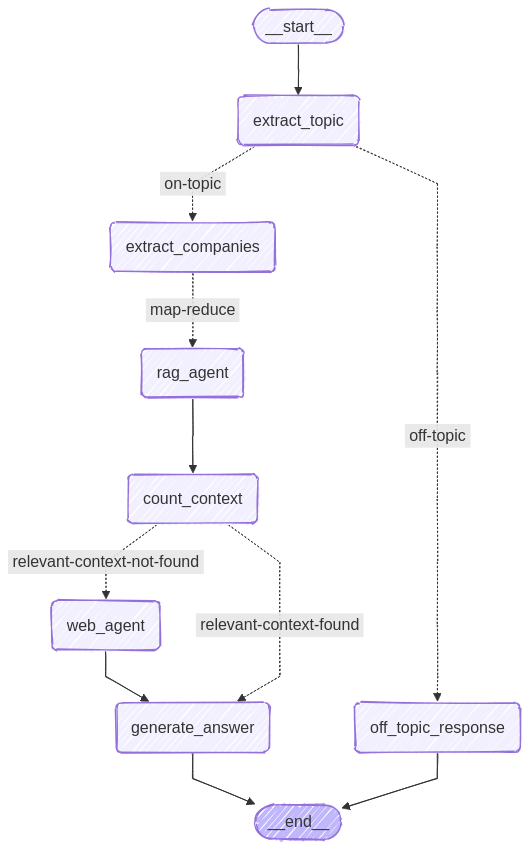

In [26]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=1).draw_mermaid_png(
    frontmatter_config={
        "config": {
            "layout": "dagre",
            "look": "handDrawn"}}
    )))

We can now stream the graph to propagate the user query through the graph-based agent in oder to generate a final answer.

In [28]:
from util import print_graph_propagation

In [85]:
# Off-topic query
query = "How is the weather in New York?"

print_graph_propagation(graph, query)

User query: How is the weather in New York?

-----------------

Graph events:
1. Node: extract_topic
    State: topic
        Content: dax_40_related=False topic='' ...
2. Node: off_topic_response
    State: final_answer
        Content: Your query is not concerned about DAX 40 companies 
    and therefore off topic within the context of this agent. ...

-----------------

Answer: Your query is not concerned about DAX 40 companies 
    and therefore off topic within the context of this agent. ...


In [86]:
# Query with specific DAX 40 companies
query = "What are the climate-related risks for Adidas and BMW?"

print_graph_propagation(graph, query)

User query: What are the climate-related risks for Adidas and BMW?

-----------------

Graph events:
1. Node: extract_topic
    State: topic
        Content: dax_40_related=True topic='climate-related risks' ...
2. Node: extract_companies
    State: companies
        Content: [Company(name='adidas'), Company(name='bmw')] ...
3. Node: rag_agent
    State: context_report
        Content: [Document(id='07512924-8d4b-40ef-b846-9dfa66092443', metadata={'company': 'adidas', 'year': 2023}, page_content='Climate scenario analysis confirmed our previous findings that the overall global green ...
4. Node: rag_agent
    State: context_report
        Content: [Document(id='98eaf969-33dd-4ac8-b975-662454b3b3ca', metadata={'company': 'bmw', 'year': 2023}, page_content='Moreover, oth er \noverarching topics are monitored by means of regular media \nanalysis.  ...
5. Node: count_context
    State: context_count
        Content: 3 ...
6. Node: generate_answer
    State: final_answer
        Content: Ad

In [ ]:
# DAX 40 related query but without mentioning any specific company
query = "Which risks do corporations face due to climate change?"

print_graph_propagation(graph, query)

User query: Which risks do corporations face due to climate change?

-----------------

Graph events:
1. Node: extract_topic
    State: topic
        Content: dax_40_related=True topic='risks due to climate change' ...
2. Node: extract_companies
    State: companies
        Content: None ...
3. Node: rag_agent
    State: context_report
        Content: [] ...
4. Node: rag_agent
    State: context_report
        Content: [] ...
5. Node: rag_agent
    State: context_report
        Content: [] ...
6. Node: rag_agent
    State: context_report
        Content: [] ...
7. Node: rag_agent
    State: context_report
        Content: [] ...
8. Node: rag_agent
    State: context_report
        Content: [] ...
9. Node: rag_agent
    State: context_report
        Content: [] ...
10. Node: rag_agent
    State: context_report
        Content: [] ...
11. Node: rag_agent
    State: context_report
        Content: [] ...
12. Node: rag_agent
    State: context_report
        Content: [] ...
13. Node: rag_

### <a id='toc4_3_'></a> Deployment

**LangGraph Studio** significantly **enhances the deployment of AI agents** by providing a comprehensive development environment tailored for LangGraph applications. It **allows developers to visualize, interact with, and debug agent workflows**, enabling the creation of scalable, production-ready AI agents with features like stateful computation, long-term memory, and human-in-the-loop capabilities.

In [88]:
!cd studio && langgraph dev

^C


Wait for LangSmith opening automatically in your default browser.

![LangGraph](img/langgraph.gif)

Resources:
- [How GenAI can enhance risk management](https://www.pwc.com/us/en/industries/financial-services/library/gen-ai-and-risk-management.html)
- [Let's talk about LlamaIndex and LangChain](https://superwise.ai/blog/lets-talk-about-llamaindex-and-langchain/)
- [LlamaIndex](https://docs.llamaindex.ai/en/stable/)
- [Advanced RAG techniques - An illustrated overview](https://pub.towardsai.net/advanced-rag-techniques-an-illustrated-overview-04d193d8fec6)